In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# VGG-16 모델을 정의합니다.
class VGG16(nn.Module):
    def __init__(self, num_classes=1000):  # ImageNet 데이터셋 기준으로 클래스의 수를 1000으로 설정합니다.
        super(VGG16, self).__init__()
        self.features = nn.Sequential(
            # 첫 번째 블록
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1), # 1층
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1), # 2층
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            # 두 번째 블록
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1), # 3층
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1), # 4층
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            # 세 번째 블록
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1), # 5층
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1), # 6층
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1), # 7층
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            # 네 번째 블록
            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=1), # 8층
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1), # 9층
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1), # 10층
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            # 다섯 번째 블록
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1), # 11층
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1), # 12층
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1), # 13층
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096), # 14층
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096), # 15층
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, num_classes), # 16층
        )
    
    def forward(self, x):
        x = F.interpolate(x, size=(224, 224), mode='bilinear', align_corners=False) # 이미지 사이즈를 vgg-16에 맞게 조정
        x = self.features(x)
        x = x.view(x.size(0), -1)  # 평탄화(flatten)
        x = self.classifier(x)
        return x

# 모델 생성
model = VGG16()

# 모델을 프린트하여 구조를 확인합니다.
print(model)

VGG16(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation

In [3]:
vgg16 = model

In [4]:
## 데이터셋 가져오기
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, Subset
import numpy as np
from torchvision.datasets import CIFAR10

In [5]:
# 데이터 전처리 및 로딩
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

train_dataset = CIFAR10(root='../data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

val_dataset = CIFAR10(root='../data', train=False, download=True, transform=transform)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


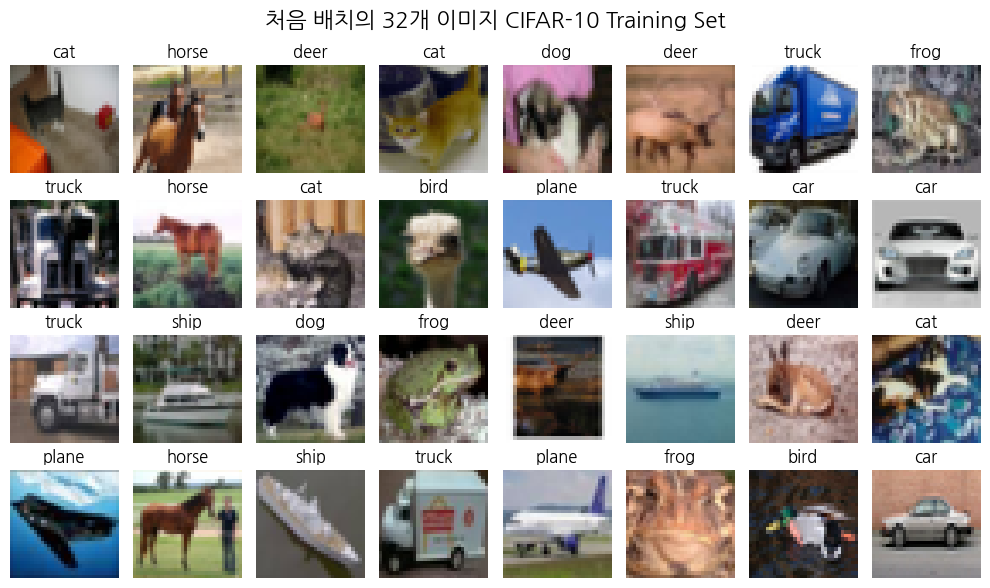

In [6]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

# CIFAR-10 클래스 이름 정의
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# 첫 번째 배치의 데이터 가져오기
dataiter = iter(train_loader)
images, labels = next(dataiter)

# 이미지 시각화를 위한 함수 정의
def imshow(ax, img):
    img = img / 2 + 0.5  # 정규화 해제
    npimg = img.numpy()
    ax.imshow(np.transpose(npimg, (1, 2, 0)))
    ax.axis('off')

# 첫 번째 배치의 32개 이미지 시각화
fig, axes = plt.subplots(4, 8, figsize=(10, 6))
fig.suptitle('처음 배치의 32개 이미지 CIFAR-10 Training Set', fontsize=16)
axes = axes.ravel()

for idx in range(32):
    ax = axes[idx]
    imshow(ax, images[idx])
    ax.set_title(classes[labels[idx].item()])

plt.tight_layout()
plt.show()

In [7]:
device = torch.device("cuda")

# 모델을 GPU로 이동
vgg16 = VGG16(num_classes=10).to(device)

# 손실 함수 및 옵티마이저 설정
criterion = nn.CrossEntropyLoss().to(device)  # 손실 함수를 GPU로 이동
optimizer = optim.SGD(vgg16.parameters(), lr=0.001, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [8]:
# 학습 및 검증 데이터 저장 리스트 초기화
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# 학습 에포크 수 설정
epochs = 10

# 모델 학습
for epoch in range(epochs):
    vgg16.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = vgg16(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_accuracy = correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # 검증 단계
    vgg16.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for data in val_loader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = vgg16(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss = val_loss / len(val_loader)
    val_accuracy = correct / total
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch [{epoch + 1}/{epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

    scheduler.step()

print('학습 완료')

Epoch [1/10], Train Loss: 2.3028, Train Accuracy: 0.0963, Val Loss: 2.3026, Val Accuracy: 0.1000
Epoch [2/10], Train Loss: 2.3027, Train Accuracy: 0.0968, Val Loss: 2.3026, Val Accuracy: 0.1000
Epoch [3/10], Train Loss: 2.3027, Train Accuracy: 0.0970, Val Loss: 2.3026, Val Accuracy: 0.1000
Epoch [4/10], Train Loss: 2.3027, Train Accuracy: 0.0970, Val Loss: 2.3026, Val Accuracy: 0.1000
Epoch [5/10], Train Loss: 2.3027, Train Accuracy: 0.0984, Val Loss: 2.3026, Val Accuracy: 0.1000
Epoch [6/10], Train Loss: 2.3027, Train Accuracy: 0.0985, Val Loss: 2.3026, Val Accuracy: 0.1000
Epoch [7/10], Train Loss: 2.3027, Train Accuracy: 0.0990, Val Loss: 2.3026, Val Accuracy: 0.1000
Epoch [8/10], Train Loss: 2.3026, Train Accuracy: 0.0997, Val Loss: 2.3026, Val Accuracy: 0.1000
Epoch [9/10], Train Loss: 2.3026, Train Accuracy: 0.0988, Val Loss: 2.3026, Val Accuracy: 0.1000
Epoch [10/10], Train Loss: 2.3026, Train Accuracy: 0.1007, Val Loss: 2.3026, Val Accuracy: 0.1000
학습 완료


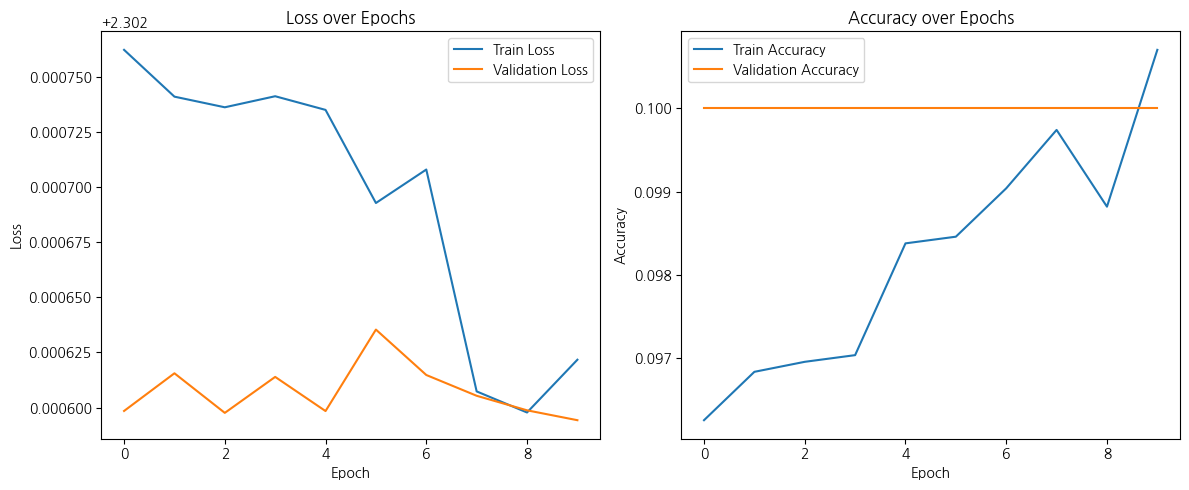

In [9]:
# 학습 결과 시각화
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.tight_layout()
plt.show()